In [1]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

.\avazu-ctr-prediction.zip
.\sampleSubmission.gz
.\test.gz
.\train.gz
.\Untitled.ipynb
.\.ipynb_checkpoints\Untitled-checkpoint.ipynb


D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
chunksize = 10 ** 6
num_of_chunk = 0
train_df = pd.DataFrame()
    
for chunk in pd.read_csv('./train.gz', chunksize=chunksize, compression='gzip'):
    num_of_chunk += 1
    train_df = pd.concat([train_df, chunk.sample(frac=.05, replace=False, random_state=123)], axis=0)
    print('Processing Chunk No. ' + str(num_of_chunk))     
    
train_df.reset_index(inplace=True)

# 備份train 資料長度，以便稍後df重新分割索引用途
train_len = len(train_df)
train_len

Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
Processing Chunk No. 28
Processing Chunk No. 29
Processing Chunk No. 30
Processing Chunk No. 31
Processing Chunk No. 32
Processing Chunk No. 33
Processing Chunk No. 34
Processing Chunk No. 35
Processing Chunk No. 36
Processing Chunk No. 37
Processing Chunk No. 38
Processing Chunk No. 39
Processing Chunk No. 40
Processing Chunk No. 41


2021448

In [3]:
# unused_cols = ["id", "hour", "device_id", "device_ip"]
unused_cols = []
label_col = "click"
train_df = train_df.drop(unused_cols, axis=1)
train_df.columns

Index(['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [4]:
test_df = pd.DataFrame()
num_of_chunk = 0   
for chunk in pd.read_csv('./test.gz', chunksize=chunksize, compression='gzip'):
    num_of_chunk += 1
    test_df = pd.concat([test_df, chunk.sample(frac=.05, replace=False, random_state=123)], axis=0)
    print('Processing Chunk No. ' + str(num_of_chunk))     
    
test_df.reset_index(inplace=True)
# 備份train 資料長度，以便稍後df重新分割索引用途
test_len = len(test_df)
test_len

Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5


228873

In [5]:
test_df = test_df.drop(unused_cols, axis=1)
X_dict_test = list(test_df.T.to_dict().values())
# y_test = test_df[label_col]
test_df.columns

Index(['index', 'id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [6]:
train_df.head()

,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,373315,2.754752e+18,1,14102102,1005,1,d9750ee7,98572c79,f028772b,ecad2386,...,1,0,17753,320,50,1993,2,1063,-1,33
1,459286,9.630799e+18,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15699,320,50,1722,0,35,100083,79
2,262398,1.048226e+19,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15703,320,50,1722,0,35,100083,79
3,789396,1.830856e+19,0,14102104,1005,1,b8eae5f9,1e334bd3,f028772b,ecad2386,...,1,0,19950,320,50,1800,3,167,100077,23
4,383229,3.559389e+18,0,14102102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15701,320,50,1722,0,35,-1,79


In [7]:
test_df.head()

,index,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,373315,5.137791e+18,14103103,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,1,0,22767,320,50,2641,3,35,100013,23
1,459286,1.731765e+19,14103104,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,23756,320,50,2724,0,291,-1,253
2,262398,4.190333e+18,14103102,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,23757,320,50,2724,0,291,-1,253
3,789396,1.696494e+19,14103106,1005,0,60c27cc6,5c488386,75fa27f6,ecad2386,7801e8d9,...,1,0,24107,320,50,2764,1,33,-1,71
4,383229,6.829663e+18,14103103,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,23137,320,50,2664,0,35,-1,51


# 合併以做預測

In [8]:
df = pd.concat([train_df, test_df]).drop(['index', 'id'], axis=1)
df.columns

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Index(['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'app_category', 'app_domain', 'app_id', 'banner_pos', 'click',
       'device_conn_type', 'device_id', 'device_ip', 'device_model',
       'device_type', 'hour', 'site_category', 'site_domain', 'site_id'],
      dtype='object')

# 確認資料型別

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250321 entries, 0 to 228872
Data columns (total 23 columns):
C1                  int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
app_category        object
app_domain          object
app_id              object
banner_pos          int64
click               float64
device_conn_type    int64
device_id           object
device_ip           object
device_model        object
device_type         int64
hour                int64
site_category       object
site_domain         object
site_id             object
dtypes: float64(1), int64(13), object(9)
memory usage: 412.0+ MB


# 把原始hour特徵中的日期，轉化為weekday

In [10]:
def get_date(hour):
    y = '20'+str(hour)[:2]
    m = str(hour)[2:4]
    d = str(hour)[4:6]
    return y+'-'+m+'-'+d

# 建立date欄位，將hour轉換後填入
df['date'] = pd.to_datetime(df.hour.apply(get_date))
df['weekday'] = pd.to_datetime(df.hour.apply(get_date)).dt.dayofweek.astype(str)
df[['hour','date','weekday']]

,hour,date,weekday
0,14102102,2014-10-21,1
1,14102102,2014-10-21,1
2,14102102,2014-10-21,1
3,14102104,2014-10-21,1
4,14102102,2014-10-21,1
5,14102102,2014-10-21,1
6,14102102,2014-10-21,1
7,14102103,2014-10-21,1
8,14102103,2014-10-21,1
9,14102104,2014-10-21,1


# 將hour資料轉換為時段

In [11]:
def switch_time(x):
    while x in [23,0]:
        return '23-01'
    while x in [1,2]:
        return '01-03'
    while x in [3,4]:
        return '03-05'
    while x in [5,6]:
        return '05-07'
    while x in [7,8]:
        return '07-09'
    while x in [9,10]:
        return '09-11'
    while x in [11,12]:
        return '11-13'
    while x in [13,14]:
        return '13-15'
    while x in [15,16]:
        return '15-17'
    while x in [17,18]:
        return '17-19'
    while x in [19,20]:
        return '19-21'
    while x in [21,22]:
        return '21-23'

def get_hour(x):
    h = int(str(x)[6:])
    h = switch_time(h)
    return h

df['hr'] = df.hour.apply(get_hour)
df[['hr','hour']]

,hr,hour
0,01-03,14102102
1,01-03,14102102
2,01-03,14102102
3,03-05,14102104
4,01-03,14102102
5,01-03,14102102
6,01-03,14102102
7,03-05,14102103
8,03-05,14102103
9,03-05,14102104


In [12]:
df.columns

Index(['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'app_category', 'app_domain', 'app_id', 'banner_pos', 'click',
       'device_conn_type', 'device_id', 'device_ip', 'device_model',
       'device_type', 'hour', 'site_category', 'site_domain', 'site_id',
       'date', 'weekday', 'hr'],
      dtype='object')

In [13]:
# 濾除不重要特徵
# unused_cols = ["id", "hour", "device_id", "device_ip","date"]
# unused_cols = ["id", "hour","date","hr"]
unused_cols = ["id", "hour"]
usecols = [col for col in df.columns if col not in unused_cols] 

In [14]:
# 確認每個特徵的value count
len_of_feature_count = {}
for i in usecols:
    print(i, ':', len(df[i].astype(str).value_counts()))
#     len_of_feature_count.append(len(df[i].astype(str).value_counts()))
    len_of_feature_count[i] = len(df[i].astype(str).value_counts())

C1 : 7
C14 : 2585
C15 : 8
C16 : 9
C17 : 466
C18 : 4
C19 : 67
C20 : 167
C21 : 61
app_category : 29
app_domain : 264
app_id : 4238
banner_pos : 7
click : 3
device_conn_type : 4
device_id : 303741
device_ip : 1068807
device_model : 5874
device_type : 5
site_category : 23
site_domain : 3599
site_id : 3113
date : 11
weekday : 7
hr : 12


In [15]:
len_of_feature_count

{'C1': 7,
 'C14': 2585,
 'C15': 8,
 'C16': 9,
 'C17': 466,
 'C18': 4,
 'C19': 67,
 'C20': 167,
 'C21': 61,
 'app_category': 29,
 'app_domain': 264,
 'app_id': 4238,
 'banner_pos': 7,
 'click': 3,
 'date': 11,
 'device_conn_type': 4,
 'device_id': 303741,
 'device_ip': 1068807,
 'device_model': 5874,
 'device_type': 5,
 'hr': 12,
 'site_category': 23,
 'site_domain': 3599,
 'site_id': 3113,
 'weekday': 7}

In [16]:
# 建立一個list，將feature數高於10的特徵名稱存入該list
obj_features = []
for col, count in len_of_feature_count.items():
    if col in ["date","hr"]: continue
    if count > 10:
#         df[i] = df[i].astype(str)
        obj_features.append(col)
obj_features

['C14',
 'C17',
 'C19',
 'C20',
 'C21',
 'app_category',
 'app_domain',
 'app_id',
 'device_id',
 'device_ip',
 'device_model',
 'site_category',
 'site_domain',
 'site_id']

In [17]:
df_click_describe = df.describe()
df_click_describe.click

count    2.021448e+06
mean     1.700731e-01
std      3.756971e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: click, dtype: float64

# 統計數值點擊率並轉換為級距

In [18]:
def obj_clean(X):
    '''定義一個取得點擊率的function'''
    def get_click_rate(x):    
        col_name = X.columns[0]
        temp = train_df[train_df[col_name] == x]
        # 計算指定索引下的平均點擊率
        res = round((temp.click.sum() / temp.click.count()),3)
        return res 
    '''定義一個取得新資料值之級距判斷的function (bias=0.02)'''
    def get_type(V, str):
        very_high = df_click_describe.loc['mean','click'] + 0.04
        higher = df_click_describe.loc['mean','click'] + 0.02
        lower = df_click_describe.loc['mean','click'] - 0.02
        very_low = df_click_describe.loc['mean','click'] - 0.04

        vh_type = V[V[str] > very_high].index.tolist()
        hr_type = V[(V[str] > higher) & (V[str] < very_high)].index.tolist()
        vl_type = V[V[str] < very_low].index.tolist()
        lr_type = V[(V[str] < lower) & (V[str] > very_low)].index.tolist()

        return vh_type, hr_type, vl_type, lr_type
    '''定義一個依據級距轉換資料值的function'''
    def clean_function(x):        
        # 判斷之依據為：總平均點擊率的正負  4% 為very_high(low), 總平均點擊率的正負 2％為higher (lower)
        while x in type_[0]:
            return 'very_high'
        while x in type_[1]:
            return 'higher'
        while x in type_[2]:
            return 'very_low'
        while x in type_[3]:
            return 'lower'
        return 'mid'
    
    def clean_function(x):
        # 定義一個依據級距轉換資料值的function
        # 判斷之依據為：總平均點擊率的正負  4% 為very_high(low), 總平均點擊率的正負 2％為higher (lower)
        while x in type_[0]:
            return 'very_high'
        while x in type_[1]:
            return 'higher'
        while x in type_[2]:
            return 'very_low'
        while x in type_[3]:
            return 'lower'
        return 'mid'
    
    
    # 定義一個縮減資料值的function，每次處理一個特徵向量
    col_name = X.columns[0]
    fq = X[col_name].value_counts() # 建立一個暫存的資料值頻率列表 (val,freq)
    print('Run: ', col_name)    
    # 理論上，將全部的資料值都進行分類轉換，可得到最佳效果；
    # 實務上為了執行時間效能，將捨去頻率低於排名前1000 row以後的資料值。
    if len(fq) > 1000:
        fq = fq[:1000]
#     print('fq: ', len(fq)) 
    # 將頻率列表轉換為dataframe，並將index填入一個新的欄位。
    fq = pd.DataFrame(fq)
    fq['new_column'] = fq.index    

    # 使用index叫用get_click_rate function，取得每個資料值的點擊率
    fq['click_rate'] = fq.new_column.apply(get_click_rate)
#     print('fq: ', fq)
    # 叫用 get_type function取得分類級距，並儲存為一個list，以便提供給下一個clean_function使用
    type_ = get_type(fq, 'click_rate')
#     print('type_: ', type_)
    process_col = X[col_name].apply(clean_function)
#     print('process_col: ', process_col.head())
    return process_col

# 縮減資料值為5個級距

In [19]:
# 使用for 迴圈將需轉換的特徵輸入到 obj_clean function
from copy import deepcopy
cons_df = deepcopy(df)
for i in obj_features:    
    cons_df[[i]] = obj_clean(df[[i]])

Run:  C14
Run:  C17
Run:  C19
Run:  C20
Run:  C21
Run:  app_category
Run:  app_domain
Run:  app_id
Run:  device_id
Run:  device_ip
Run:  device_model
Run:  site_category
Run:  site_domain
Run:  site_id


In [24]:
cons_df.drop(['hour','date'], axis=1, inplace=True)
cons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250321 entries, 0 to 228872
Data columns (total 24 columns):
C1                  int64
C14                 object
C15                 int64
C16                 int64
C17                 object
C18                 int64
C19                 object
C20                 object
C21                 object
app_category        object
app_domain          object
app_id              object
banner_pos          int64
click               float64
device_conn_type    int64
device_id           object
device_ip           object
device_model        object
device_type         int64
site_category       object
site_domain         object
site_id             object
weekday             object
hr                  object
dtypes: float64(1), int64(7), object(16)
memory usage: 509.2+ MB


In [32]:
cons_df.head()

,C1,C14,C15,C16,C17,C18,C19,C20,C21,app_category,...,device_conn_type,device_id,device_ip,device_model,device_type,site_category,site_domain,site_id,weekday,hr
0,1005,very_high,320,50,very_high,2,very_high,higher,very_high,higher,...,0,mid,very_high,higher,1,mid,very_high,very_high,1,01-03
1,1005,higher,320,50,mid,0,mid,higher,mid,higher,...,0,mid,mid,higher,1,higher,higher,higher,1,01-03
2,1005,higher,320,50,mid,0,mid,higher,mid,higher,...,0,mid,mid,lower,1,higher,higher,higher,1,01-03
3,1005,very_low,320,50,very_low,3,mid,mid,very_high,higher,...,0,mid,mid,lower,1,mid,very_low,very_low,1,03-05
4,1005,higher,320,50,mid,0,mid,higher,mid,higher,...,0,mid,mid,very_high,1,higher,higher,higher,1,01-03


# 確認所有特徵的資料值狀況

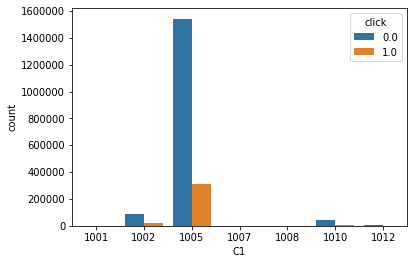

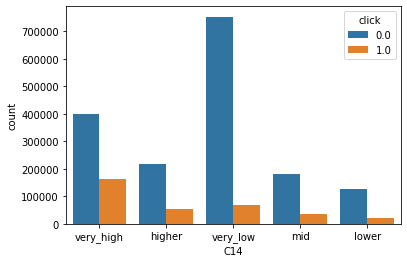

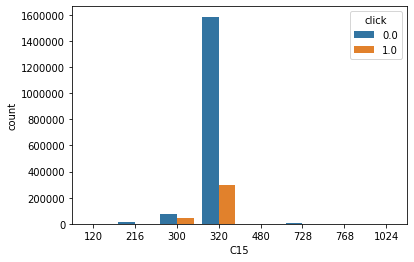

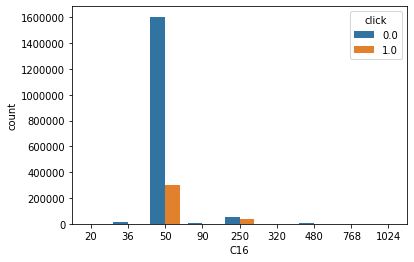

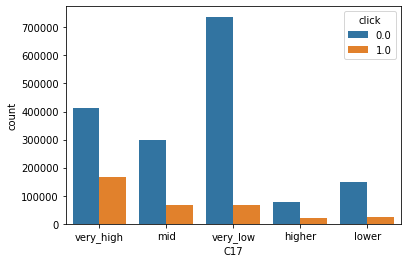

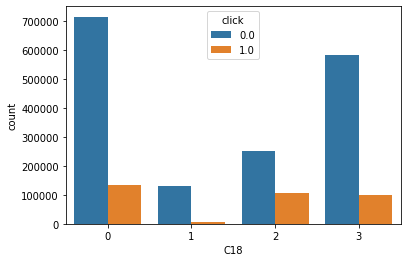

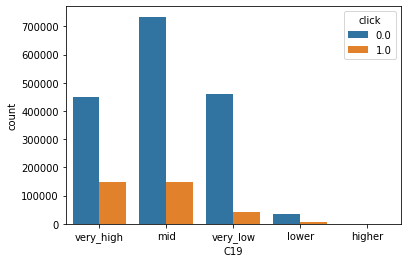

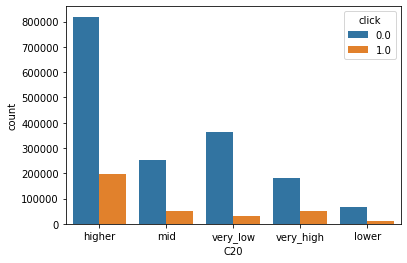

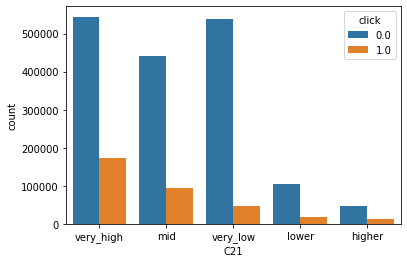

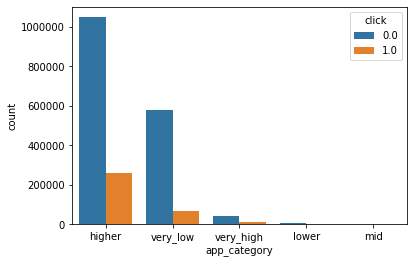

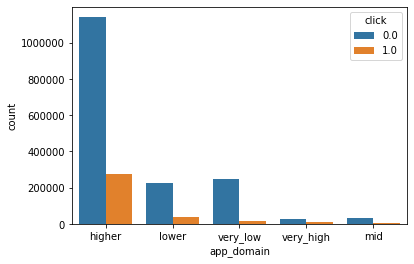

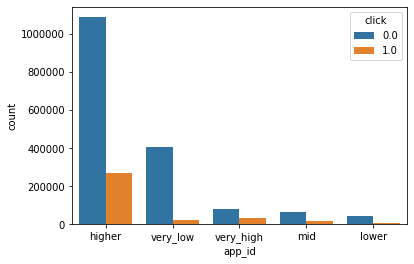

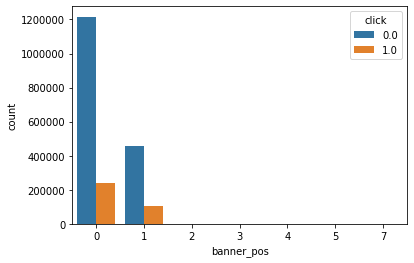

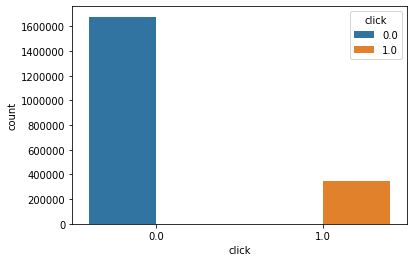

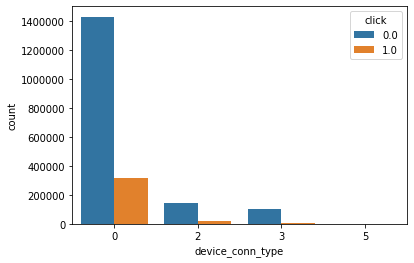

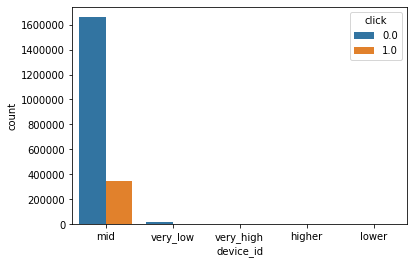

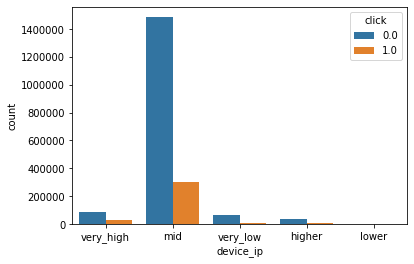

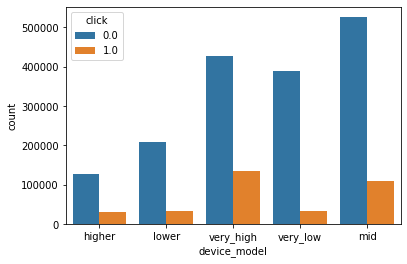

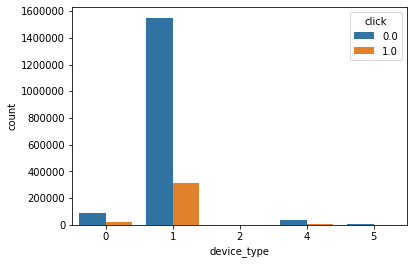

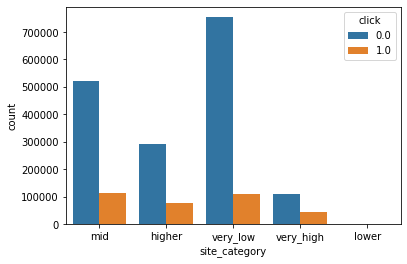

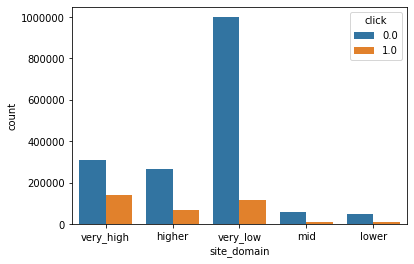

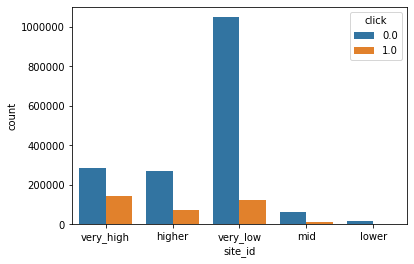

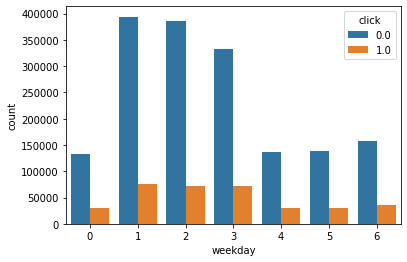

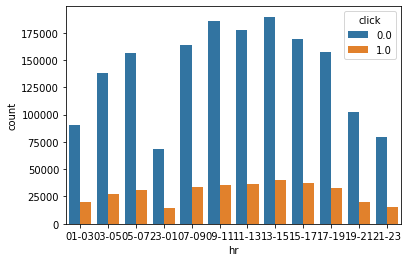

In [25]:
for i in cons_df.columns:
    sns.countplot(x = i, hue = "click", data = cons_df)
    plt.show()

# 對所有變數進行 one-hot 編碼

In [33]:
cons_df.to_csv('cons_df.csv', index=False)

In [26]:
one_cons_df = pd.get_dummies(cons_df)
# 依據處理過得df資料表，重新將train, test分割出來
train = one_cons_df[:train_len]
test = one_cons_df[train_len:]

# 查看標籤為0和1的數量

In [36]:
print("Label-0 , count : %s" % len(train[train['click']==0]))
print("Label-1 , count : %s" % len(train[train['click']==1]))

Label-0 , count : 1677654
Label-1 , count : 343794


# 訓練/測試資料準備

In [37]:
# 標籤為0的資料中，隨機抽樣與標籤為1一樣多的數量，
# 並將其結合成正反標籤佔筆各佔50％的資料集
pre_X = train[train['click'] == 0].sample(n=len(train[train['click'] == 1]), random_state=111)
pre_X = pd.concat([pre_X, train[train['click'] == 1]]).sample(frac=1)

In [38]:
pre_y = pre_X[['click']]
pre_X.drop(['click'], axis=1, inplace=True)
test.drop(['click'], axis=1, inplace=True)

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 資料集分割

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 將新的資料集分割為訓練集與驗證集
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(pre_X, pre_y, test_size=0.20, stratify=pre_y, random_state=1)

# 第一階段Grid Search縮減特徵

In [42]:
from sklearn.externals import joblib
# 執行Grid Search調參，建立100棵樹來取得最佳參數
params = {"criterion":["gini", "entropy"], "max_depth":range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train, pre_y_train)

# save model
# https://www.codenong.com/54197831/
joblib.dump(grid_search.best_estimator_,'stage1_dcs_tree.pk1',compress=1)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 38 candidates, totalling 3800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 148.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 184.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 201.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 234.1min
[Parallel(n_jobs=-1)]: Done 3800 out of 3800 | elapsed: 270.5min finished


(0.7375566461930939,
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 {'criterion': 'entropy', 'max_depth': 11})

In [45]:
# 依據Grid Search的結果建立一個決策樹模型，並fit完整資料 (前置資料)
# tree = joblib.load('stage1_dcs_tree.pk1')
tree = grid_search.best_estimator_
tree.fit(pre_X,pre_y)

# 輸出重要特徵，並依特徵之重要性排序
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
site_id_very_low,0.384019
app_id_very_high,0.158882
C14_very_low,0.080506
site_id_very_high,0.070130
app_id_very_low,0.051284
C16,0.029041
app_category_higher,0.022695
device_model_very_high,0.014607
device_conn_type,0.011468
device_model_lower,0.010415


# 第二階段Grid Search縮減特徵

In [51]:
# 調整前置作業訓練集與驗證集，將特徵依特徵重要性縮減為重要性排名之1/3
pre_X_train_import = pre_X_train[feature_importances.index[:int(len(feature_importances)/3)]]
pre_X_test_import = pre_X_test[feature_importances.index[:int(len(feature_importances)/3)]]
pre_X_train_import.columns

Index(['site_id_very_low', 'app_id_very_high', 'C14_very_low',
       'site_id_very_high', 'app_id_very_low', 'C16', 'app_category_higher',
       'device_model_very_high', 'device_conn_type', 'device_model_lower',
       'C21_very_low', 'banner_pos', 'site_category_higher',
       'site_domain_very_low', 'device_id_very_low', 'C18', 'C14_very_high',
       'device_id_very_high', 'hr_19-21', 'C15', 'C20_very_low', 'hr_17-19',
       'app_domain_very_low', 'C20_mid', 'site_category_mid', 'C1',
       'C21_higher', 'C14_lower', 'app_domain_lower', 'site_id_higher',
       'device_model_very_low', 'device_ip_very_high'],
      dtype='object')

In [52]:
# 使用33％的重要特徵重新進行Grid Search調參
params = {"criterion":["gini", "entropy"], "max_depth":range(1,12)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train_import, pre_y_train)
# save model
joblib.dump(grid_search.best_estimator_,'stage2_dcs_tree.pk1',compress=1)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 22 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed: 27.9min finished


(0.736844237708457,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 {'criterion': 'gini', 'max_depth': 11})

In [53]:
# 調整前置作業完整資料集，將特徵依特徵重要性再次縮減為重要性排名之1/3
pre_X_import = pre_X[feature_importances.index[:int(len(feature_importances)/3)]]

# 依據Grid Search的結果建立一個決策樹模型，並fit完整資料 (前置資料)
# tree = joblib.load('stage2_dcs_tree.pk1')
tree = grid_search.best_estimator_
tree.fit(pre_X_import,pre_y)

# 輸出重要特徵，並依特徵之重要性排序
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train_import.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
site_id_very_low,0.421608
app_id_very_high,0.169802
C14_very_low,0.078677
site_id_very_high,0.072428
app_id_very_low,0.048453
C16,0.026618
app_category_higher,0.023258
device_model_very_high,0.016249
site_domain_very_low,0.011633
device_model_lower,0.011630


In [54]:
# 最終預測模型之特徵，將採用特徵值 .005以上的變數
feature_len = len(feature_importances[feature_importances[feature_importances.columns[0]] > 0.005])

# 調整最終完整Train Set 與 Test set之特徵
Y = train[['click']]
X = train[feature_importances[:feature_len].index]
test = test[feature_importances[:feature_len].index]

# 最終預測模型

In [56]:
from xgboost import XGBClassifier
# 使用xgboost 建模，並指定先前調參得到的節點深度限制使用xgboost 建模，並指定先前調參得到的節點深度限制
model = XGBClassifier(tree_method = 'hist', n_jobs=-1, n_estimators=500, max_depth=11)
model.fit(X,Y.values.ravel())
Y_pred = model.predict(X)
print("Roc_auc_score: ",roc_auc_score(Y,Y_pred)*100,"%")

Roc_auc_score:  51.88332338067303 %


# 繪出混淆矩陣，查看預測結果

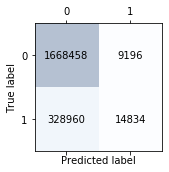

In [58]:
confmat = confusion_matrix(y_true=Y, y_pred=Y_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

# 匯出submission並進行提交

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


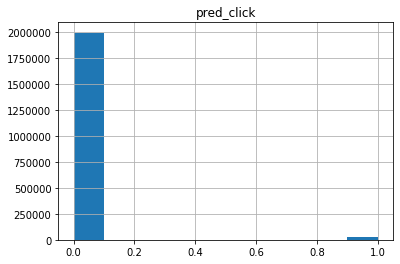

In [103]:
a = pd.DataFrame(Y,columns=['click'])
b = pd.DataFrame(Y_pred,columns=['pred_click'])

c = pd.concat([a,b],axis=0)
b.hist()
plt.show()

In [120]:
test_df['click'] = model.predict_proba(test)[:,1] # 輸出class B也就是click=True的機率
submission = test_df[['click']]

In [121]:
submission.reset_index(drop=True, inplace=True)
submission.to_csv('submission.csv')

In [ ]:
# 試試lightgbm/xgbboost找重要特徵

In [ ]:
# 試試多種進階決策樹 RF/GBDT/XGBoost/LightGBM 建模並預測
# 原文網址：https://kknews.cc/code/mr6pvbg.html
